In [27]:
import tensorflow as tf

from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [34]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# transform to rgb as required by VGG
train_img=tf.image.grayscale_to_rgb(tf.expand_dims(train_images, axis=3)) 
test_img=tf.image.grayscale_to_rgb(tf.expand_dims(test_images, axis=3))

#resize to minimum size of (32x32)
train_img=tf.image.resize_with_pad(train_img,32,32)
test_img=tf.image.resize_with_pad(test_img,32,32)

train_img = train_img / 255.
test_img = test_img / 255.

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [35]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False


model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(64, activation='elu'),

    layers.Dense(64, activation='elu'),

    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='Nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [155]:
model.fit(train_img, train_labels, epochs=10, batch_size=32, validation_data=(test_img, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 63ms/step - accuracy: 0.7590 - loss: 0.6949 - val_accuracy: 0.8415 - val_loss: 0.4374
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - accuracy: 0.8498 - loss: 0.4092 - val_accuracy: 0.8505 - val_loss: 0.4103
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 65ms/step - accuracy: 0.8573 - loss: 0.3817 - val_accuracy: 0.8573 - val_loss: 0.3965
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - accuracy: 0.8657 - loss: 0.3582 - val_accuracy: 0.8580 - val_loss: 0.3963
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 65ms/step - accuracy: 0.8718 - loss: 0.3435 - val_accuracy: 0.8619 - val_loss: 0.3800
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 64ms/step - accuracy: 0.8771 - loss: 0.3295 - val_accuracy: 0.8639 - val_loss: 0.3849
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 64ms/step - accuracy: 0.8815 - loss: 0.3213 - val_accuracy: 0.8627 - val_loss: 0.3845
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 64ms/step - accuracy: 

Спробуємо навчити модель з генерацією данних 

In [18]:
train_datagen = ImageDataGenerator(
    rotation_range=40,         
    width_shift_range=0.2,     
    height_shift_range=0.2,   
    shear_range=0.2,           
    zoom_range=0.2,            
    horizontal_flip=True,      
)

train_generator = train_datagen.flow(
    train_img, 
    train_labels, 
    batch_size=32
)


test_generator = train_datagen.flow(
    test_img, 
    test_labels, 
    batch_size=32
)


model.fit(train_generator, epochs=10, validation_data = test_generator)



Epoch 1/10
   2/1875 ━━━━━━━━━━━━━━━━━━━━ 1:49 58ms/step - accuracy: 0.8516 - loss: 0.4725

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 126s 67ms/step - accuracy: 0.7739 - loss: 0.6118 - val_accuracy: 0.7709 - val_loss: 0.6209
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 125s 67ms/step - accuracy: 0.7766 - loss: 0.6024 - val_accuracy: 0.7688 - val_loss: 0.6242
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 66ms/step - accuracy: 0.7812 - loss: 0.5861 - val_accuracy: 0.7775 - val_loss: 0.6010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 66ms/step - accuracy: 0.7849 - loss: 0.5790 - val_accuracy: 0.7807 - val_loss: 0.6051
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 126s 67ms/step - accuracy: 0.7828 - loss: 0.5785 - val_accuracy: 0.7768 - val_loss: 0.5981
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 69ms/step - accuracy: 0.7829 - loss: 0.5739 - val_accuracy: 0.7780 - val_loss: 0.6001
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 70ms/step - accuracy: 0.7902 - loss: 0.5642 - val_accuracy: 0.7828 - val_loss: 0.5860
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.7917 - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


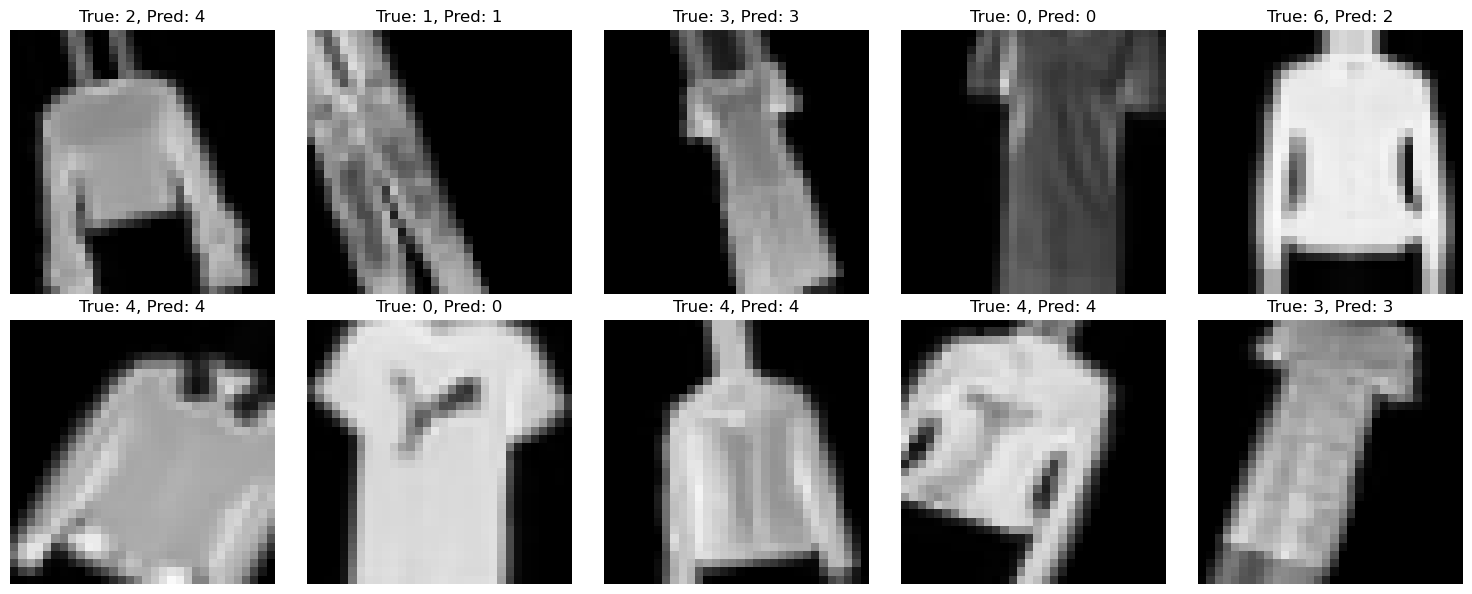

In [23]:
import matplotlib.pyplot as plt
import numpy as np


images, labels = next(test_generator) 


images = images[:10]
labels = labels[:10]


predictions = model.predict(images)


predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)


fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]
    ax.imshow(images[i])  
    ax.set_title(f"True: {true_classes[i]}, Pred: {predicted_classes[i]}")  
    ax.axis('off')  

plt.tight_layout()
plt.show()


Висновок: Найкраще працювала модель з задання 12. Ящко аналізувати модель 1 і 2 с завдання 13 то краще працює модель без генерації даних